In [3]:
################### INTRODUCTION ######################

In [4]:
# The K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly
# dicover insights from unlabeled data. 

### Some real-world application of k-means:
# -> Customer segmentation
# -> Understand what the visitors of a website are trying to accomplish
# -> Pattern recognition
# -> Machine Leaning
# -> Data compression

In [5]:
## In this notebook, we practice k-means clustering with 2- examples:-
# -> k-means on a random generated dataset
# -> Using k-means for customer segmentation

In [6]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [7]:
######### k-Means on a randomly generated dataset ###############

In [8]:
# First we need to set up a random seed. Use numpy's random.seed() function, where the seed will be set to 0
np.random.seed(0)

In [9]:
# Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but ewe will be using these specific ones.
# Input:-
# -> n_samples: The total number of points equally divided among clusters.
        ## Value will be: 5000
# -> centers: The number of centers to generate, or the fixed center locations.
        ## Value will be: [[4,4], [-2,-1], [2,-3], [1,1]]
# -> cluster_std: The standard deviation of the clusters.
        ## Value will be: 0.9
    
# Output:-
# -> X: Array of shape [n_samples, n_features]. (Feature Matrix)
        ## The generated samples.
# -> Y: Array of shape [n_samples]. (Response Vector)
        ## The integer lables for cluster membership of each sample.

In [10]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2,-3], [1,1]], cluster_std = 0.9)

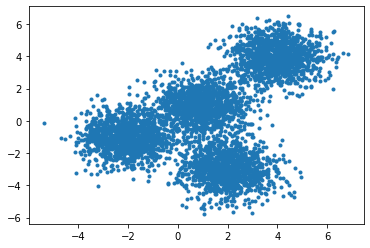

In [11]:
# Display the scatter plot of the randomly generated data.
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [12]:
################### Setting up K-Means ###################

In [13]:
# The KMeans class has many parameters that can be used, but we will be using these three:

#-> init: Initialization method of the centroids.
    ## Value will be: "k-Means++"
    ## k-means++: Selects initial cluster centers for k-mean clustering in a smart way speed up convergence.
    
#-> n_clusters: The number of clusters to form as well as the number of centroids to generate.
    ## Value will be: 4 (since we have 4 centers)
    
#-> n_init: Number of times the k-means algo will be run with diff centroid seeds. The final results will be the best o/p of n_init censecutive runs in terms of inertia.
        ## Value will be : 12

In [14]:
# Initialize KMeans with these parameters, where the o/p parameters is called k_means.
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init=12)

In [15]:
# Now let's fit the KMeans model with the feature matrix we created above, X,
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# Now let's grab the labels for each point in the model using KMeans'.labels_ attribute and save it as k_means_labels
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [18]:
# We will also get the coordinates of the cluster centers using KMeans'.cluster_centers_ and save it as k_means_cluster_centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

In [19]:
################### Creating the Virtual Plot ##################

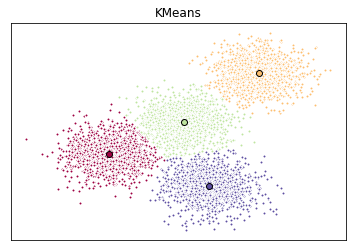

In [20]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6,4))


# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))


# Create a plot
ax = fig.add_subplot(1 ,1 ,1)

# for loop that plots the data points and centroids. 
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2,-1], [2,-3], [1,1]])), colors):
    
    # Create a list of all data points, where the data pts that are 
    # in the cluster (ex. cluser 0) are labeled as true, else they are 
    # labeled as fale.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [21]:
####### Changed Into Three Cluster #######

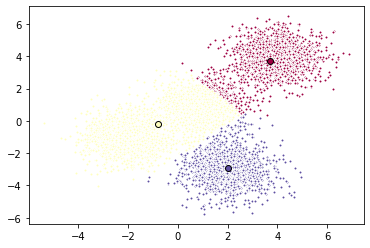

In [22]:
k_means3 = KMeans(init = "k-means++", n_clusters= 3, n_init= 12)
k_means3.fit(X)

fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_==k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.show()

In [23]:
############# CUSTOMER SEGMENTATION WITH K-Means ####################

In [49]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv'

In [50]:
import wget
filname = wget.download(url)

100% [..............................................................................] 33426 / 33426

In [24]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [25]:
########### Pre-processing #########

In [26]:
# Address in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because 
# Euclidean distance function isn't really meaningful for discrete veriables. So, lets drop this feature and run clustering

In [27]:
df = cust_df.drop('Address', axis =1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [28]:
########### Normalizing over the standard deviation ############

In [29]:
# Normalization is a statistical method that helps mathematical-based algo to interpret features with different magnitudes and distribution equally.
# We use StandardScaler() to normalize our dataset.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [32]:
################ Modeling ###################

In [34]:
# It would be the same as guessing that each customer grp would have certain age, income, edu, etc. with multiple tests and experiments.
# However, using the K-means clustering we can do all this process much easier.

# Lets apply k-means on our dataset, and take look at cluster labels.

In [35]:
clusterNum = 3
k_means = KMeans(init ="k-means++", n_clusters= clusterNum, n_init= 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [36]:
############ Insights ##############

In [37]:
# We assign the labels to each row in dataframe.

In [38]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [39]:
# We can easily check the centroid values by averaging the features in each cluster.

In [40]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


In [41]:
# Now, lets look at the distribution of customers based on their age, and income:

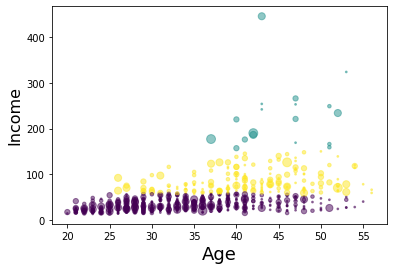

In [45]:
area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha =0.5)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize=16)

plt.show()

In [46]:
from mpl_toolkits.mplot3d import Axes3D

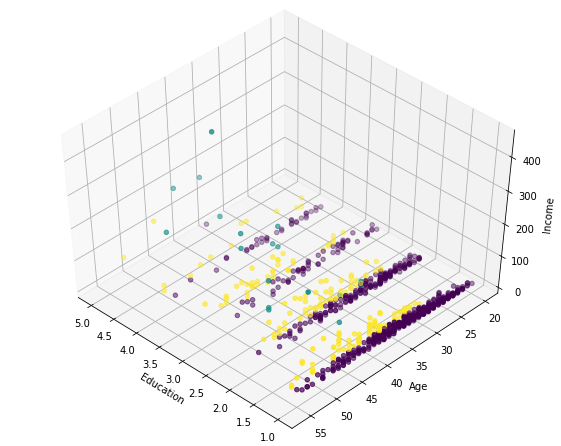

In [54]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.y_label('Age', fontsize=18)
# plt.x_label('Income', fontsize=16)
# plt.z_label('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

In [53]:
# k-means will partition your customers into mutually exclusive grps, for e.g. into 3 clusters. The customers in each cluster are similar to each
# other demographically. Now we can create a profile for each grp, considering the common characteristics of each cluster.
# For e.g. the 3 clusters can be:

## AFFLUENT, EDUCATED AND OLD AGED
## MIDDLE AGED AND MIDDLE INCOME
## YOUNG AND LOW INCOME